### Business Problem Understanding 

* Create a model to understand the optimum Discount percentage that can availed on a product depending on other factors. 

### Data Understanding-

* This sample data displays sales data of an e-commerce aggregator including various factors.

**Independent Variables-**

* User ID - Provides Unique User Identity
* Product ID - provides unique product identity
* Category- denotes the product category
* Price - denotes the MRP
* Final price - denotes the final price after applying the discount
* Payment method - denotes the type of payment method used

**Dependent Variables-**

* Discount- denotes the discount in percentage

### Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import warnings                    
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("ecommerce_dataset.csv")
df.head()

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 200.3+ KB


In [4]:
# Rename columns 

In [5]:
df.columns.tolist()

['User_ID',
 'Product_ID',
 'Category',
 'Price (Rs.)',
 'Discount (%)',
 'Final_Price(Rs.)',
 'Payment_Method']

In [6]:
df= df.rename(columns={'Price (Rs.)':'Price', 'Discount (%)':'Discount', 'Final_Price(Rs.)':'Final_Price'})
df

,User_ID,Product_ID,Category,Price,Discount,Final_Price,Payment_Method
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking
...,...,...,...,...,...,...,...
3655,67abda0a,28714133-6,Beauty,486.79,0,486.79,UPI
3656,34ebc1a0,08838c2c-9,Toys,212.87,15,180.94,Cash on Delivery
3657,1defd3b1,c39a4f16-6,Home & Kitchen,389.76,0,389.76,Net Banking
3658,0611293d,b4f67f96-9,Electronics,447.66,30,313.36,UPI


In [7]:
df.isnull().sum()

User_ID           0
Product_ID        0
Category          0
Price             0
Discount          0
Final_Price       0
Payment_Method    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['User_ID'].nunique()

3660

In [10]:
df['Product_ID'].nunique()

3660

In [11]:
df['Category'].value_counts()

Category
Home & Kitchen    549
Books             534
Clothing          531
Toys              523
Sports            520
Beauty            505
Electronics       498
Name: count, dtype: int64

In [12]:
df['Discount'].value_counts()

Discount
0     480
15    474
10    473
20    472
5     470
30    449
50    430
25    412
Name: count, dtype: int64

In [13]:
df['Payment_Method'].value_counts()

Payment_Method
Credit Card         760
UPI                 757
Debit Card          731
Net Banking         716
Cash on Delivery    696
Name: count, dtype: int64

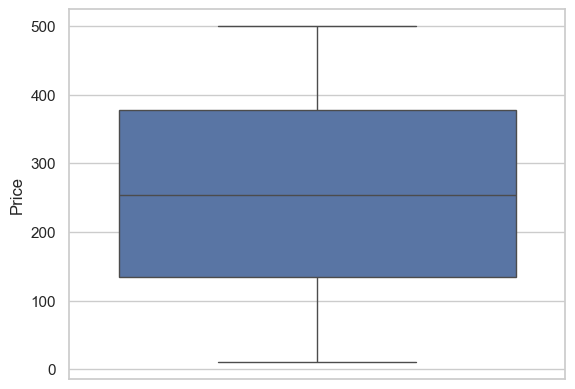

In [14]:
sns.boxplot(df['Price'])
plt.show()

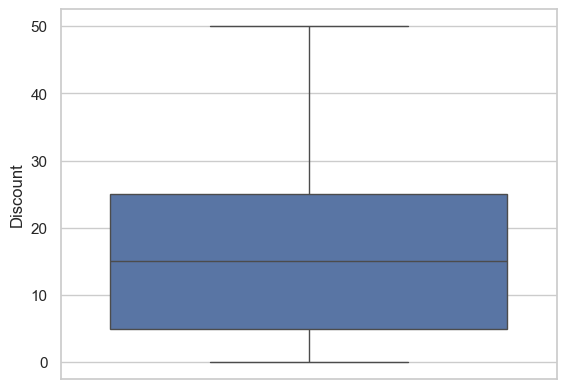

In [15]:
sns.boxplot(df['Discount'])
plt.show()

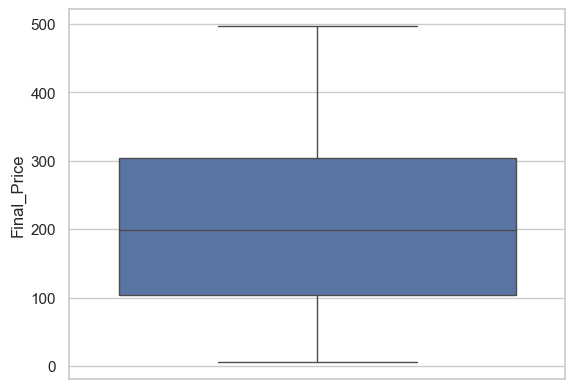

In [16]:
sns.boxplot(df['Final_Price'])
plt.show()

* No Outlier value present 

In [17]:
continuous = ['Price', 'Final_Price']

categorical = ['Category', 'Payment_Method']

In [18]:
df[continuous].describe()

,Price,Final_Price
count,3660.000000,3660.000000
mean,254.800675,206.906579
std,141.682621,122.687844
min,10.090000,5.890000
25%,134.012500,104.512500
50%,253.845000,199.185000
75%,377.595000,304.117500
max,499.960000,496.820000


In [19]:
df[categorical].describe()

,Category,Payment_Method
count,3660,3660
unique,7,5
top,Home & Kitchen,Credit Card
freq,549,760


### Data Cleaning-

In [20]:
df.drop(['User_ID','Product_ID'], axis=1 , inplace=True)
df

,Category,Price,Discount,Final_Price,Payment_Method
0,Sports,36.53,15,31.05,Net Banking
1,Clothing,232.79,20,186.23,Net Banking
2,Sports,317.02,25,237.76,Credit Card
3,Toys,173.19,25,129.89,UPI
4,Beauty,244.80,20,195.84,Net Banking
...,...,...,...,...,...
3655,Beauty,486.79,0,486.79,UPI
3656,Toys,212.87,15,180.94,Cash on Delivery
3657,Home & Kitchen,389.76,0,389.76,Net Banking
3658,Electronics,447.66,30,313.36,UPI


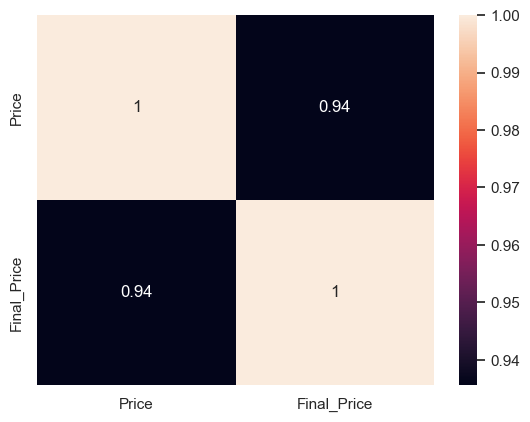

In [21]:
#heatmap continuous

sns.heatmap( df[continuous].corr(), annot=True )
plt.show()

In [22]:
# Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Category'] = le.fit_transform(df["Category"])
df['Payment_Method'] = le.fit_transform(df["Payment_Method"])

df

,Category,Price,Discount,Final_Price,Payment_Method
0,5,36.53,15,31.05,3
1,2,232.79,20,186.23,3
2,5,317.02,25,237.76,1
3,6,173.19,25,129.89,4
4,0,244.80,20,195.84,3
...,...,...,...,...,...
3655,0,486.79,0,486.79,4
3656,6,212.87,15,180.94,0
3657,4,389.76,0,389.76,3
3658,3,447.66,30,313.36,4


In [23]:
# Check Skewness

print('Variable Skewness:-')

print('Category: ', df['Category'].skew() )

print('Price: ',df['Price'].skew() )

print('Discount: ',df['Discount'].skew() )

print('Final_Price: ',df['Final_Price'].skew() )

print('Payment_Method: ',df['Payment_Method'].skew() )

Variable Skewness:-
Category:  -0.0045762275135342746
Price:  -0.005350567978094971
Discount:  0.7661132736389676
Final_Price:  0.23760411981835936
Payment_Method:  -0.002129444847380124


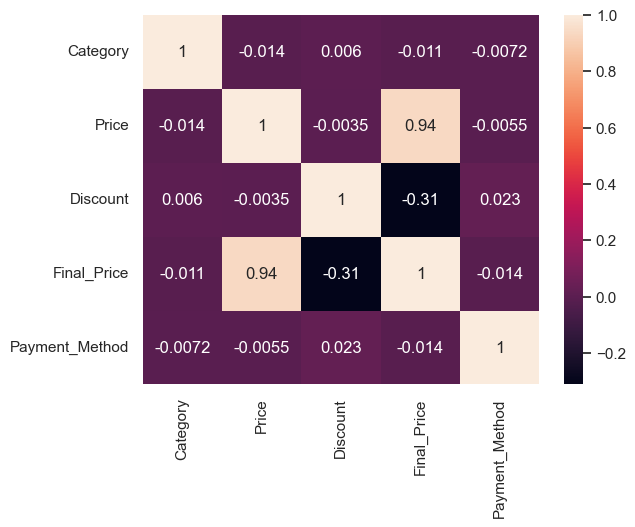

In [29]:
# Heatmap

sns.heatmap( df.corr(), annot=True )
plt.show()

In [ ]:
# Even though there's low correlation between variables, all variables are necessary as of now to conduct further analysis.
# We may remove unnecessary variables in future. 

In [25]:
df.to_excel('Ecommerce_Cleaned_Data.xlsx' , index=False)